In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [3]:
print(data.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0  


In [6]:
data = data[data['Rating'] != 3]
print(len(data['Brand Name'].unique()))
print(len(data))

383
382075


In [7]:
print(len(data['Product Name'].unique()))

4377


In [8]:
print(data.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0  


In [9]:
data['Positively_Rated'] = np.where(data['Rating']>3,1,0)

In [10]:
target = data['Positively_Rated']

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

count    376738.000000
mean        230.279529
std         274.499147
min           1.730000
25%          79.990000
50%         149.950000
75%         276.370000
max        2598.000000
Name: Price, dtype: float64


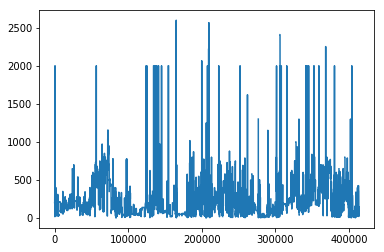

In [12]:
print(data['Price'].describe())
plt.plot(data['Price'])

In [13]:
print(data.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0       5  I feel so LUCKY to have found this used (phone...           1.0   
1       4  nice phone, nice up grade from my pantach revu...           0.0   
2       5                                       Very pleased           0.0   
3       4  It works good but it goes slow sometimes but i...           0.0   
4       4  Great phone to replace my lost phone. The only...           0.0   

   Positively_Rated  
0                 1  
1                 1  
2             

In [14]:
features = pd.DataFrame()
features['Reviews'] = data['Reviews']

In [15]:
print(len(data['Review Votes'].unique()))

233


In [16]:
print(features.head())

                                             Reviews
0  I feel so LUCKY to have found this used (phone...
1  nice phone, nice up grade from my pantach revu...
2                                       Very pleased
3  It works good but it goes slow sometimes but i...
4  Great phone to replace my lost phone. The only...


In [17]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [18]:
new_feature = features['Reviews'][:10]

In [19]:
print(new_feature.head())

0    I feel so LUCKY to have found this used (phone...
1    nice phone, nice up grade from my pantach revu...
2                                         Very pleased
3    It works good but it goes slow sometimes but i...
4    Great phone to replace my lost phone. The only...
Name: Reviews, dtype: object


In [20]:
# take one sentence and change it to lower case and 
# then stem it and join (toughest part of the problem..)
# and then append it to the dataframe ....

sent = new_feature[0]
print(sent)

word = word_tokenize(sent)
for i in range(4):
    print()
    
print(word)

s = PorterStemmer()

arr = []

for i in word:
    i = i.lower()
    i = s.stem(i)
    arr.append(i)
    
for i in range(4):
    print()
print(arr)

for i in range(4):
    print()
    
    
arr1 = ""
for i in arr:
    i += " "
    arr1 += i
    
print("the returned array is \n")
print(arr1)
        

I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!




['I', 'feel', 'so', 'LUCKY', 'to', 'have', 'found', 'this', 'used', '(', 'phone', 'to', 'us', '&', 'not', 'used', 'hard', 'at', 'all', ')', ',', 'phone', 'on', 'line', 'from', 'someone', 'who', 'upgraded', 'and', 'sold', 'this', 'one', '.', 'My', 'Son', 'liked', 'his', 'old', 'one', 'that', 'finally', 'fell', 'apart', 'after', '2.5+', 'years', 'and', 'did', "n't", 'want', 'an', 'upgrade', '!', '!', 'Thank', 'you', 'Seller', ',', 'we', 'really', 'appreciate', 'it', '&', 'your', 'honesty', 're', ':', 'said', 'used', 'phone.I', 'recommend', 'this', 'seller', 'very', 'highly', '&', 'would', 'but', 'from', 'them', 'aga

In [21]:
def lemmatizing(s):
    # do the word_tokenize ..... 
    word = word_tokenize(s)
    
    # lemmatize all the words .....
    arr = []
    lemmatizer = WordNetLemmatizer()
    for i in word:
        j = ""
        j = lemmatizer.lemmatize(j)
        arr.append(j)
        
    # concatenate all the words together 
    arr1 = ""
    for i in arr:
        arr1 += " " + i
        
    return arr1

In [22]:
one = new_feature[0]

In [23]:
print(one)
for i in range(4):
    print()
    
print(lemmatizing(one))

I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!




                                                                                   


In [24]:
lemma = WordNetLemmatizer()

In [25]:
word = word_tokenize(one)
print(one)
for i in range(4):
    print()
for i in word:
    i = i.lower()
    print(lemma.lemmatize(i),end=" ")

I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!




i feel so lucky to have found this used ( phone to u & not used hard at all ) , phone on line from someone who upgraded and sold this one . my son liked his old one that finally fell apart after 2.5+ year and did n't want an upgrade ! ! thank you seller , we really appreciate it & your honesty re : said used phone.i recommend this seller very highly & would but from them again ! ! 

In [26]:
print(features.head())

                                             Reviews
0  I feel so LUCKY to have found this used (phone...
1  nice phone, nice up grade from my pantach revu...
2                                       Very pleased
3  It works good but it goes slow sometimes but i...
4  Great phone to replace my lost phone. The only...


In [27]:
print(data.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0       5  I feel so LUCKY to have found this used (phone...           1.0   
1       4  nice phone, nice up grade from my pantach revu...           0.0   
2       5                                       Very pleased           0.0   
3       4  It works good but it goes slow sometimes but i...           0.0   
4       4  Great phone to replace my lost phone. The only...           0.0   

   Positively_Rated  
0                 1  
1                 1  
2             

In [28]:
def stemming(s):
    
    
    # convert it to word 
    word = word_tokenize(sent)
    stem = PorterStemmer()
    arr = []
    for i in word:
        i = i.lower()
        i = stem.stem(i)
        arr.append(i)
        
    arr1 = ""
    for i in arr:
        arr1 += " " + i
    return arr1

In [29]:
string = features['Reviews'][0]
string = str(string)
print(stemming(string))

 i feel so lucki to have found thi use ( phone to us & not use hard at all ) , phone on line from someon who upgrad and sold thi one . my son like hi old one that final fell apart after 2.5+ year and did n't want an upgrad ! ! thank you seller , we realli appreci it & your honesti re : said use phone.i recommend thi seller veri highli & would but from them again ! !


In [30]:
feature = map(stemming,features['Reviews'])

In [31]:
print(feature)

In [32]:
arr = []
for i in features['Reviews']:
    arr.append(i)

In [33]:
print(len(arr))

382075


In [34]:
print(len(features['Reviews']))

382075


In [35]:
text = "This is the first sentence. This is the second one. And this is the last one."
sentences = sent_tokenize(text)
words = [word_tokenize(sent) for sent in sentences]
print(words)

[['This', 'is', 'the', 'first', 'sentence', '.'], ['This', 'is', 'the', 'second', 'one', '.'], ['And', 'this', 'is', 'the', 'last', 'one', '.']]


In [36]:
print(features.head())

                                             Reviews
0  I feel so LUCKY to have found this used (phone...
1  nice phone, nice up grade from my pantach revu...
2                                       Very pleased
3  It works good but it goes slow sometimes but i...
4  Great phone to replace my lost phone. The only...


In [39]:
arr = []
for i in features['Reviews']:
    arr.append(i)

In [48]:
print(arr[:2])

["I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!", 'nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung']


In [53]:
print(data.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0       5  I feel so LUCKY to have found this used (phone...           1.0   
1       4  nice phone, nice up grade from my pantach revu...           0.0   
2       5                                       Very pleased           0.0   
3       4  It works good but it goes slow sometimes but i...           0.0   
4       4  Great phone to replace my lost phone. The only...           0.0   

   Positively_Rated  
0                 1  
1                 1  
2             

In [54]:
data['Reviews'].apply(stemming)

0          i feel so lucki to have found thi use ( phone...
1          i feel so lucki to have found thi use ( phone...
2          i feel so lucki to have found thi use ( phone...
3          i feel so lucki to have found thi use ( phone...
4          i feel so lucki to have found thi use ( phone...
5          i feel so lucki to have found thi use ( phone...
6          i feel so lucki to have found thi use ( phone...
7          i feel so lucki to have found thi use ( phone...
8          i feel so lucki to have found thi use ( phone...
11         i feel so lucki to have found thi use ( phone...
12         i feel so lucki to have found thi use ( phone...
13         i feel so lucki to have found thi use ( phone...
14         i feel so lucki to have found thi use ( phone...
15         i feel so lucki to have found thi use ( phone...
16         i feel so lucki to have found thi use ( phone...
17         i feel so lucki to have found thi use ( phone...
18         i feel so lucki to have found

In [55]:
print(data.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0       5  I feel so LUCKY to have found this used (phone...           1.0   
1       4  nice phone, nice up grade from my pantach revu...           0.0   
2       5                                       Very pleased           0.0   
3       4  It works good but it goes slow sometimes but i...           0.0   
4       4  Great phone to replace my lost phone. The only...           0.0   

   Positively_Rated  
0                 1  
1                 1  
2             

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [ ]:
cnt_vect = CountVectorizer(1,3).fit(features)

In [ ]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,3)).fit(features)

In [ ]:
print(cnt_vect)

In [ ]:
print(tfidf_vect)